# **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from numpy import where
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import string
import nltk  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
import pandas as pd
from textblob.classifiers import NaiveBayesClassifier
import numpy as np
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
from csv import reader
from nltk.cluster import KMeansClusterer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Loading the data**

In [ ]:
df=pd.read_csv("fifa19.csv")

In [ ]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,L. Messi,31,Argentina,94,94,FC Barcelona,RF,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,ST,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,LW,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,GK,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,RCM,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,102.0


# **Describe the dataset attributes**

In [ ]:
df.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
count,17955.000000,17955.000000,17955.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,...,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17955.000000
mean,25.095349,66.228237,71.323197,49.751885,45.586698,52.298878,58.717261,42.935500,55.420283,47.218630,...,48.546043,58.651868,47.262467,47.684202,45.644441,16.587536,16.365276,16.203105,16.356062,2.444530
std,4.659778,6.921015,6.139378,18.351445,19.511503,17.361599,14.673721,17.685432,18.899100,18.384605,...,15.685745,11.421007,19.872750,21.647299,21.271215,17.662332,16.875398,16.467295,16.989954,5.626715
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,0.325000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,0.700000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,2.100000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,118.500000


In [ ]:
# Columns Names
list(df)

['Name',
 'Age',
 'Nationality',
 'Overall',
 'Potential',
 'Club',
 'Position',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'Value']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17955 non-null  object 
 1   Age              17955 non-null  int64  
 2   Nationality      17955 non-null  object 
 3   Overall          17955 non-null  int64  
 4   Potential        17955 non-null  int64  
 5   Club             17955 non-null  object 
 6   Position         17907 non-null  object 
 7   Crossing         17907 non-null  float64
 8   Finishing        17907 non-null  float64
 9   HeadingAccuracy  17907 non-null  float64
 10  ShortPassing     17907 non-null  float64
 11  Volleys          17907 non-null  float64
 12  Dribbling        17907 non-null  float64
 13  Curve            17907 non-null  float64
 14  FKAccuracy       17907 non-null  float64
 15  LongPassing      17907 non-null  float64
 16  BallControl      17907 non-null  float64
 17  Acceleration

# **Apply data cleaning methods**

In [ ]:
df.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club                0
Position           48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
Value               0
dtype: int64

In [ ]:
df = df.dropna()

df.isnull().sum()

Name               0
Age                0
Nationality        0
Overall            0
Potential          0
Club               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
Value              0
dtype: int64

# **Visualize Top 10 clubs with highest value of players**

In [ ]:
club_value = df[['Value']].groupby(df['Club']).apply(np.sum)
top_club_value = club_value.nlargest(10,'Value')
top_club_value

,Value
Club,
Real Madrid,874.425
FC Barcelona,852.600
Manchester City,786.555
Juventus,704.475
FC Bayern München,679.025
Atlético Madrid,644.525
Paris Saint-Germain,625.325
Tottenham Hotspur,618.450
Chelsea,606.815


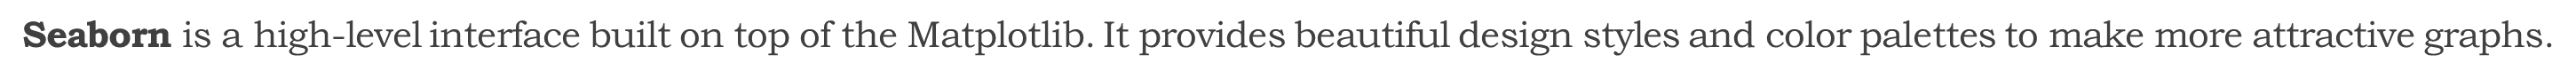

Text(0.5, 1.0, 'Top 10 clubs with highest value of players')

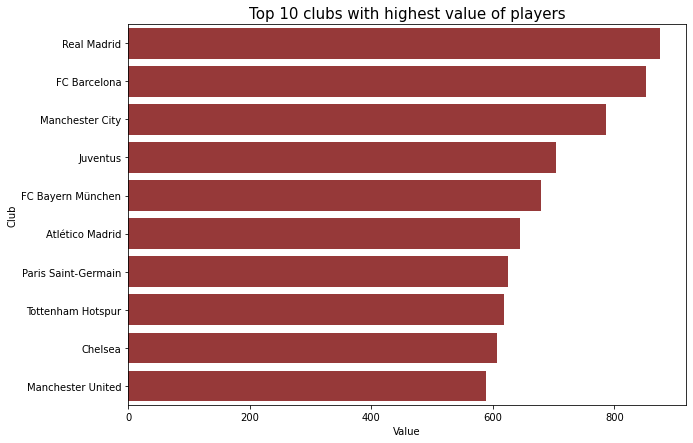

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'Value', y = top_club_value.index, data = top_club_value, color='brown')
plt.title('Top 10 clubs with highest value of players', fontsize = 15)

**Observation:**
Real Madrid club owns one of the most expensive players for the rest of the clubs

# **Visualiz Age VS Average SprintSpeed of players**

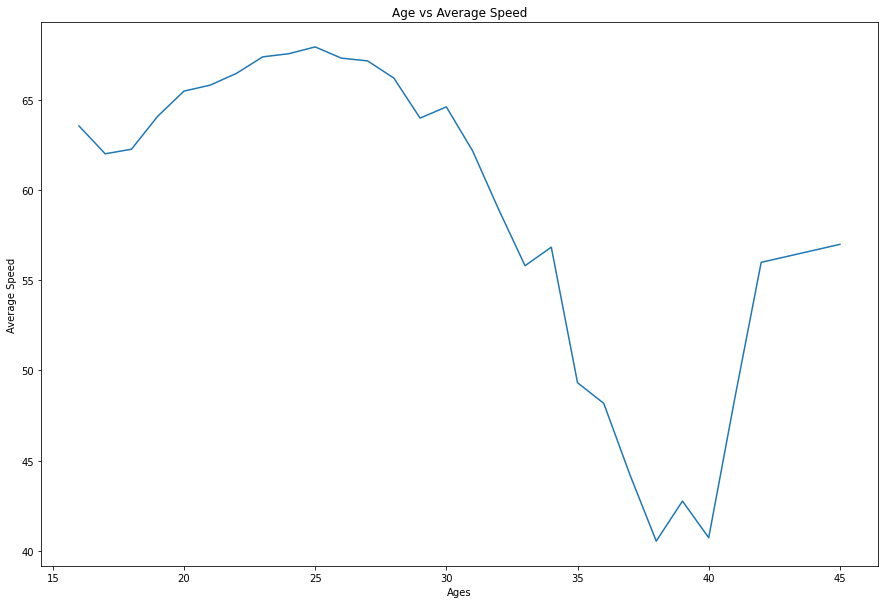

In [ ]:
unique_ages = df["Age"].unique()
unique_ages = sorted(unique_ages)
SprintSpeeds = []

for age in unique_ages:
    avg_df = df[df["Age"] == age]["SprintSpeed"]
    mean = avg_df.mean()
    SprintSpeeds.append(mean)

plt.figure(figsize=(15,10))
plt.plot(unique_ages, SprintSpeeds, linestyle="-")
plt.xlabel("Ages");
plt.ylabel("Average Speed");
plt.title("Age vs Average Speed");

**Observation:**
The older the player gets, the lower his speed, but there are special cases

# **Visualize Top 25 players Overall Rating**

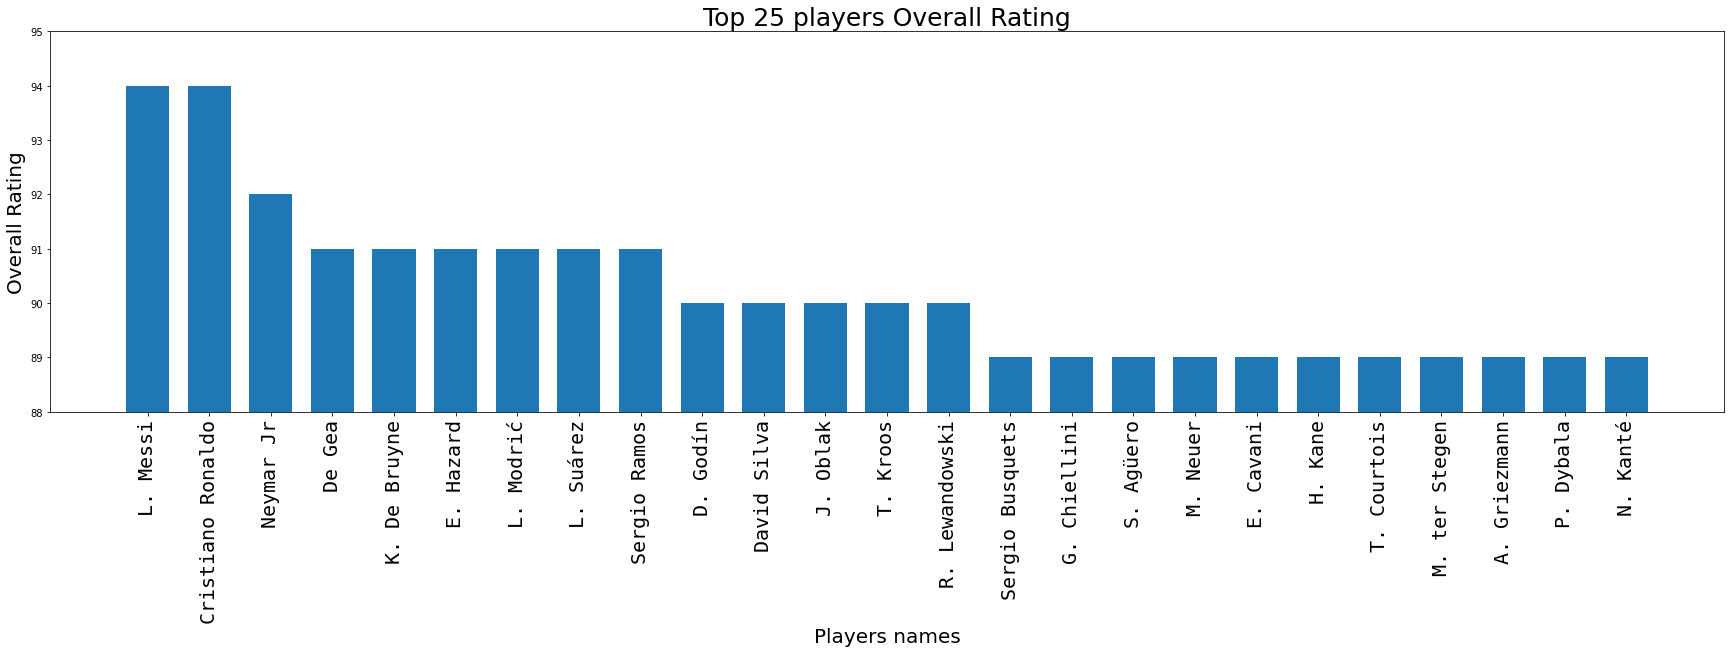

In [ ]:
df_best_players = pd.DataFrame.copy(df.sort_values(by = 'Overall' , ascending = False ).head(25))

plt.figure(figsize=(30, 7))
plt.bar('Name' , 'Overall' , data = df_best_players, width=0.7)
plt.xlabel('Players names', fontsize=20) 
plt.xticks(rotation = 90,fontsize=20, fontname='monospace')
plt.ylabel('Overall Rating', fontsize=20)
plt.title('Top 25 players Overall Rating', fontsize=25)
plt.ylim(88 , 95)
plt.show()

**Observation:**
L. Messi is the highest player in terms of Overall Rating

# **Apply anomaly detection technique to find outliers using LOF**

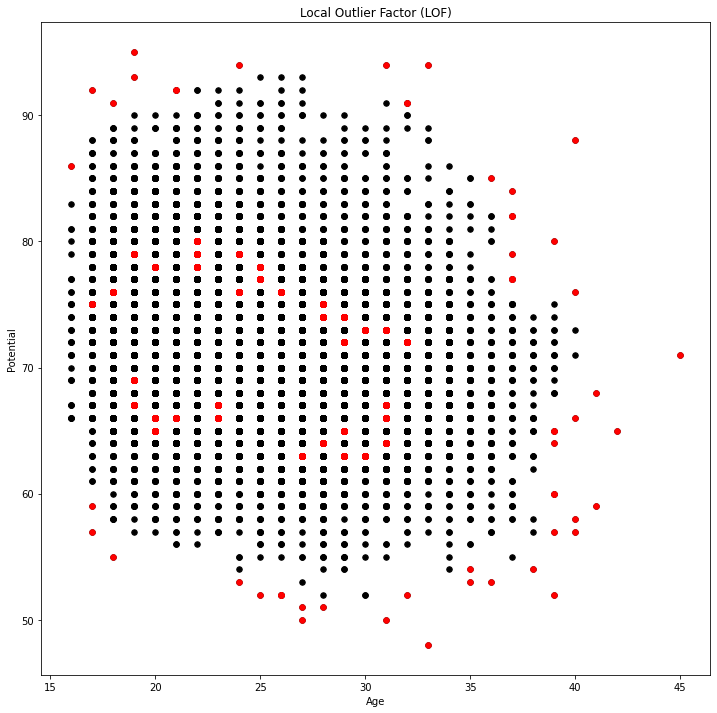

In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')

X = df[['Age','Potential']].values
y_pred = clf.fit_predict(X)

plt.figure(figsize=(12,12))

out_lier = where(y_pred == -1)
value = X[out_lier]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:,0], X[:,1], c = 'black', s = 30)

plt.scatter(value[:, 0], value[:, 1], c = 'red', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Potential');
plt.show()

# **Apply predictive analytic techniques**

In [ ]:
train = df.head(50)

x = train[["Value", "Age", "Crossing", "Finishing", "HeadingAccuracy", "Penalties", "Composure",	"Marking", 
           "StandingTackle", "SlidingTackle",	"GKDiving",	"GKHandling", "GKKicking", "GKPositioning"]]
y = train["Overall"]

model = LinearRegression()
clf = model.fit(x, y)
pred = model.predict(x)

for index in range(len(pred)):
  print("Actual: ", y[index], "    ", "Prediction: ", pred[index])

Actual:  94      Prediction:  94.2165836347101
Actual:  94      Prediction:  92.4145831888795
Actual:  92      Prediction:  92.87456105617775
Actual:  91      Prediction:  90.89816406603694
Actual:  91      Prediction:  91.43513514881386
Actual:  91      Prediction:  90.5431550338142
Actual:  91      Prediction:  90.47847064070797
Actual:  91      Prediction:  91.44566688992934
Actual:  91      Prediction:  89.75740951555298
Actual:  90      Prediction:  89.46356973400898
Actual:  90      Prediction:  90.07786989638869
Actual:  90      Prediction:  89.87199682402094
Actual:  90      Prediction:  89.62824695354558
Actual:  90      Prediction:  89.79595272527455
Actual:  89      Prediction:  88.20812026946052
Actual:  89      Prediction:  88.86770853600213
Actual:  89      Prediction:  88.75571727542265
Actual:  89      Prediction:  89.59659331303234
Actual:  89      Prediction:  88.69753041405737
Actual:  89      Prediction:  88.20647163648428
Actual:  89      Prediction:  88.3223871570

In [ ]:
x = df[["Overall", "Age", "Crossing", "Finishing", "HeadingAccuracy", "Penalties", "Composure",	"Marking", 
           "StandingTackle", "SlidingTackle",	"GKDiving",	"GKHandling", "GKKicking", "GKPositioning"]].values
y = df["Value"]

model = RandomForestRegressor(n_estimators=100) #n_estimators ==> trees numbers
model.fit(x,y)
pred = model.predict(x)

for index in range(1,200):
  print("Actual: ", y[index], "    ", "Prediction: ", pred[index])

Actual:  77.0      Prediction:  85.535
Actual:  118.5      Prediction:  106.995
Actual:  72.0      Prediction:  69.055
Actual:  102.0      Prediction:  93.285
Actual:  93.0      Prediction:  89.945
Actual:  67.0      Prediction:  62.985
Actual:  80.0      Prediction:  80.725
Actual:  51.0      Prediction:  54.31
Actual:  68.0      Prediction:  64.495
Actual:  77.0      Prediction:  73.55
Actual:  76.5      Prediction:  71.79
Actual:  44.0      Prediction:  43.79
Actual:  60.0      Prediction:  65.985
Actual:  63.0      Prediction:  60.355
Actual:  89.0      Prediction:  82.37
Actual:  83.5      Prediction:  80.56
Actual:  78.0      Prediction:  75.19
Actual:  58.0      Prediction:  57.6
Actual:  53.5      Prediction:  55.495
Actual:  51.5      Prediction:  51.18
Actual:  60.0      Prediction:  62.445
Actual:  38.0      Prediction:  37.95
Actual:  64.5      Prediction:  67.625
Actual:  27.0      Prediction:  29.255
Actual:  81.0      Prediction:  75.64
Actual:  69.5      Prediction:  71

# **Predictive Analytic Chart**

In [ ]:
x = df[["Overall"]].values
y = df["Value"]

model = RandomForestRegressor(n_estimators=100) #n_estimators ==> trees numbers
model.fit(x,y)
pred = model.predict(x)

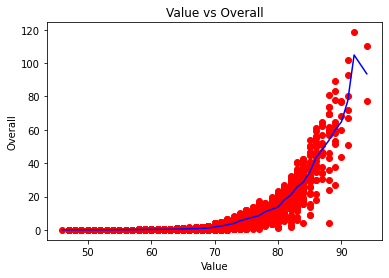

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color = 'red')
plt.plot(x, pred, color = 'blue')
plt.title('Value vs Overall')
plt.xlabel('Value')
plt.ylabel('Overall')
plt.show()

# **Apply text mining for the text dataset**

In [ ]:
data=pd.read_csv("IMDB Dataset.csv",dtype=str)
lower=data['review'].str.lower()
print("LOWER CASE")
print(lower)
punc=lower.str.translate(str.maketrans(" "," ",string.punctuation))
print("WITHOUT PUNCTUATION")
print(punc)

LOWER CASE
0       one of the other reviewers has mentioned that ...
1       a wonderful little production. <br /><br />the...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
4994    joel schumacher made a heck of a choice when h...
4995    an interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    once again jet li brings his charismatic prese...
4998    i rented this movie, after hearing chris gore ...
Name: review, Length: 4999, dtype: object
WITHOUT PUNCTUATION
0       one of the other reviewers has mentioned that ...
1       a wonderful little production br br the filmin...
2       i thought this was a wonderful way to spend ti...
3       basically theres a family where a little boy j...
4       petter matteis love in the time of money is a ...

In [ ]:
stop_words =set(stopwords.words('english'))
print("STOP WORDS")
print(stop_words)

STOP WORDS
{"weren't", 'again', 'can', 'ours', 'during', 'they', 'than', 'because', 'isn', 'does', 'while', 'been', 'under', "didn't", 'should', "shan't", 'more', 'yours', 'aren', 'which', 'an', 'himself', "doesn't", 'd', "you'd", 'wasn', 'he', 'between', 'mustn', 'hadn', 'out', 'nor', 'mightn', 'your', 'through', 'then', 'it', "hasn't", "couldn't", 'what', 'was', 'off', 'now', 'why', 'herself', "wouldn't", 'yourself', 'so', "wasn't", 'that', 'itself', 'y', 'o', 'here', 'had', 'i', 'such', 'of', 'into', 'and', 'am', 'any', 'each', "haven't", "hadn't", 'most', 'only', 'very', 'has', 'after', "you're", 'above', "don't", 'too', 'wouldn', 'm', 'doesn', 're', 'won', 'didn', 'in', "you've", 'all', 'her', 'don', "shouldn't", 'for', "mustn't", 'is', 'other', 'own', 've', 'hasn', "won't", 'when', 'were', 'do', 'my', 'ain', 'their', "you'll", 'but', 's', 'will', 'our', 'these', 'about', "it's", 'further', 'against', 'same', 'him', 'yourselves', 'be', 'them', 'to', 'on', 'where', 'doing', 'some',

In [ ]:
word_tokens = word_tokenize(str(punc))

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print("TOKENIZE")
print(word_tokens)
print("Without Stop Words")
print(filtered_sentence)

TOKENIZE
['0', 'one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', '...', '1', 'a', 'wonderful', 'little', 'production', 'br', 'br', 'the', 'filmin', '...', '2', 'i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'ti', '...', '3', 'basically', 'theres', 'a', 'family', 'where', 'a', 'little', 'boy', 'j', '...', '4', 'petter', 'matteis', 'love', 'in', 'the', 'time', 'of', 'money', 'is', 'a', '...', '...', '4994', 'joel', 'schumacher', 'made', 'a', 'heck', 'of', 'a', 'choice', 'when', 'h', '...', '4995', 'an', 'interesting', 'slasher', 'film', 'with', 'multiple', 'susp', '...', '4996', 'i', 'watched', 'this', 'series', 'when', 'it', 'first', 'came', 'out', 'i', '...', '4997', 'once', 'again', 'jet', 'li', 'brings', 'his', 'charismatic', 'prese', '...', '4998', 'i', 'rented', 'this', 'movie', 'after', 'hearing', 'chris', 'gore', 's', '...', 'Name', ':', 'review', ',', 'Length', ':', '4999', ',', 'dtype', ':', 'object']
Without Stop Words
['0', 'one', '

In [ ]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
print("Stemming:")
for word in filtered_sentence:
   print(stemmer.stem(word))
print("///////////////////Lemmatization//////////////////")
for word in filtered_sentence:
   print(lemmatizer.lemmatize(word))

Stemming:
0
one
review
mention
...
1
wonder
littl
product
br
br
filmin
...
2
thought
wonder
way
spend
ti
...
3
basic
there
famili
littl
boy
j
...
4
petter
mattei
love
time
money
...
...
4994
joel
schumach
made
heck
choic
h
...
4995
interest
slasher
film
multipl
susp
...
4996
watch
seri
first
came
...
4997
jet
li
bring
charismat
prese
...
4998
rent
movi
hear
chri
gore
...
name
:
review
,
length
:
4999
,
dtype
:
object
///////////////////Lemmatization//////////////////
0
one
reviewer
mentioned
...
1
wonderful
little
production
br
br
filmin
...
2
thought
wonderful
way
spend
ti
...
3
basically
there
family
little
boy
j
...
4
petter
matteis
love
time
money
...
...
4994
joel
schumacher
made
heck
choice
h
...
4995
interesting
slasher
film
multiple
susp
...
4996
watched
series
first
came
...
4997
jet
li
brings
charismatic
prese
...
4998
rented
movie
hearing
chris
gore
...
Name
:
review
,
Length
:
4999
,
dtype
:
object


In [ ]:
# #classification
# # open file in read mode
with open('IMDB Dataset.csv', 'r') as readerObj:
    # here passing the file object to reader() to get the reader object
    csv_reader = reader(readerObj)
    #Read all CSV files into the tuples
    tuplesList = tuple(csv_reader)

In [ ]:
train= tuplesList[1:500]
test=tuplesList[4000:4500]
c= NaiveBayesClassifier(train)
print("Classification")
print(c.classify("No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes. Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies. Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.<br /><br />I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies, renting this movie is about the only way you'll see it - even the cable channels avoid this movie."))
accuracy=c.accuracy(test)
print("accuracy: ",accuracy)

Classification
negative
accuracy:  0.71


In [ ]:
# #Cluster
model=Word2Vec(tuplesList,min_count=1)
output=[]
for sentence in tuplesList[1:50]:
    vector=[]
    wc=0
    for word in sentence:
        if wc==0:
            vector=model[word]
        else:
            vector=np.add(vector,model[word])
        wc+=1
    output.append(np.asarray(vector))
kclusterer=KMeansClusterer(2,distance=nltk.cluster.util.euclidean_distance,repeats=1000)
assigned_clusters=kclusterer.cluster(output, assign_clusters=True)
for i,sentence in enumerate(tuplesList[1:50]):
  print(str(assigned_clusters[i])+":"+str(sentence))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


1:["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the